In [1]:
# Menginstall Library pm4py

!pip install pm4py==2.2.30

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 9.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 16.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 24.4 MB/s eta 0:00:00
  Created wheel for intervaltree: filename=intervaltree-3.1.0-py2.py3-none-any.whl size=26094 sha256=c0f17ed9a286813c459c0b24abb018eda09274bf6bc44e6b0b0ac7dfc091e6af
  Stored in directory: /root/.cache/pip/wheels/fa/80/8c/43488a924a046b733b64de3fac99252674c892a4c3801c0a61
  Created wheel for stringdist: filename=StringDist-1.0.9-cp310-cp310-linux_x86_64.whl size=16967 sha256=1da7c243d67e324fdfe54c337b139486c5e06a34aee7769ead8a30ecf16e8d76
  Stored in directory: /root/.cache/pip/wheels/79/25/0a/4a0c2c7af31a8b473f6e10e30312396f31ae899722600d7b99
Successfully built intervaltree stringdist


In [49]:
# Mengimport library yang dibutuhkan

import pm4py
import pandas as pd

from pm4py.objects.log.importer.xes import importer as xes_importer
from pm4py.objects.conversion.log import converter as log_converter
from pm4py.objects.log.util import dataframe_utils
from pm4py.algo.discovery.inductive import algorithm as inductive_miner

from pm4py.visualization.petri_net import visualizer as pn_visualizer
from pm4py.visualization.process_tree import visualizer as pt_visualizer

from pm4py.objects.conversion.process_tree import converter as pt_converter
from pm4py.objects.log.util import interval_lifecycle
from pm4py.util import constants

from datetime import datetime, timedelta
from pm4py.util import xes_constants
from pm4py.objects.conversion.log import converter as conversion_factory

import pandas as pd
import numpy as np
from datetime import date
from IPython.display import Markdown, display
import matplotlib.pyplot as plt
import seaborn as sns

case_id_key = xes_constants.DEFAULT_TRACEID_KEY
activity_key = xes_constants.DEFAULT_NAME_KEY
timestamp_key = datetime.now()

In [113]:
xlsx_file = "Input Event Log.xlsx"
df = pd.read_excel(xlsx_file)
df = pm4py.format_dataframe(df, case_id='Case ID', activity_key='Activity', start_timestamp_key='Finish Time', timestamp_key='Start Time')


log = log_converter.apply(df)
log = interval_lifecycle.to_interval(log)

log = interval_lifecycle.assign_lead_cycle_time(log, parameters={
        constants.PARAMETER_CONSTANT_START_TIMESTAMP_KEY: "Start Time",
        constants.PARAMETER_CONSTANT_TIMESTAMP_KEY: "Finish Time"})

replaying log with TBR, completed variants ::   0%|          | 0/15 [00:00<?, ?it/s]

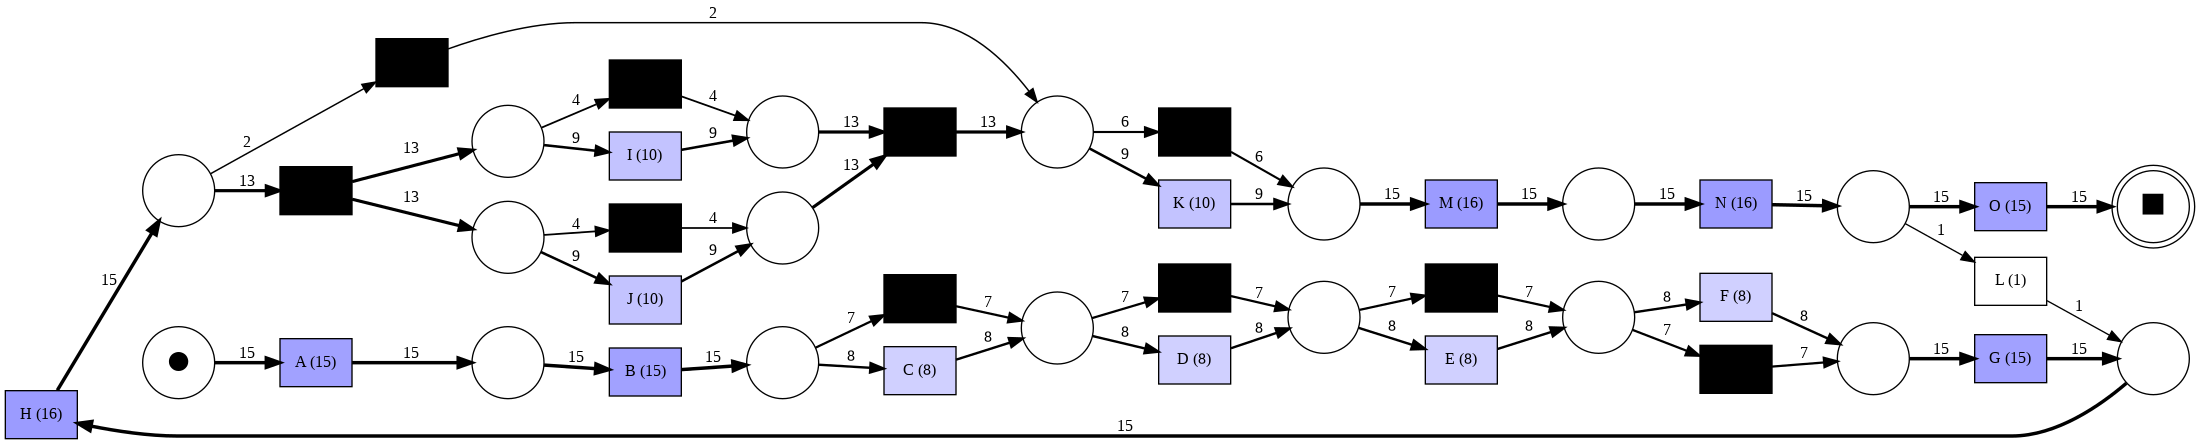

In [117]:
net, initial_marking, final_marking = inductive_miner.apply(log)

parameters = {pn_visualizer.Variants.FREQUENCY.value.Parameters.FORMAT: "png"}
gviz = pn_visualizer.apply(net, initial_marking, final_marking,
                           parameters=parameters,
                           variant=pn_visualizer.Variants.FREQUENCY,
                           log=log)
pn_visualizer.view(gviz)